# Lab 1 Evaluation

Names, Surnames, and Group : 
- Zhang yu groupe C
- Zeng yongjia groupe C

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import csv
import numpy as np
from utils import load_from_csv
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 

train_examples, train_labels, features, prediction = load_from_csv("./compas_binarized.csv")

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

Q1: A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

In [7]:
clf = tree.DecisionTreeClassifier(splitter="best",max_depth =None,min_samples_leaf=1,max_features=None,random_state=None,criterion="gini")

Q2: Train a decision tree for each of the previous configurations on the full dataset

In [18]:
clf1 = tree.DecisionTreeClassifier(splitter="random")

clf2 = tree.DecisionTreeClassifier(max_depth =10)

clf3 = tree.DecisionTreeClassifier(min_samples_leaf=1)

clf4 = tree.DecisionTreeClassifier(max_features=None)

clf5 = tree.DecisionTreeClassifier(random_state=None)

clf6 = tree.DecisionTreeClassifier(criterion="gini")

clf1.fit(train_examples,train_labels)
clf2.fit(train_examples,train_labels)
clf3.fit(train_examples,train_labels)
clf4.fit(train_examples,train_labels)
clf5.fit(train_examples,train_labels)
clf6.fit(train_examples,train_labels)


DecisionTreeClassifier()

Q3: Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different topologies

In [19]:
scores1 = cross_val_score(clf1, train_examples, train_labels, cv=5)
scores2 = cross_val_score(clf2, train_examples, train_labels, cv=5)
print("scores de décision tree 1 :",scores1.mean() )
print("scores de décision tree 2 :",scores2.mean() )

scores de décision tree 1 : 0.6508943089430895
scores de décision tree 2 : 0.6533333333333334


Q4: Propose an experimental study that shows the transition phase from underfitting to overfitting 

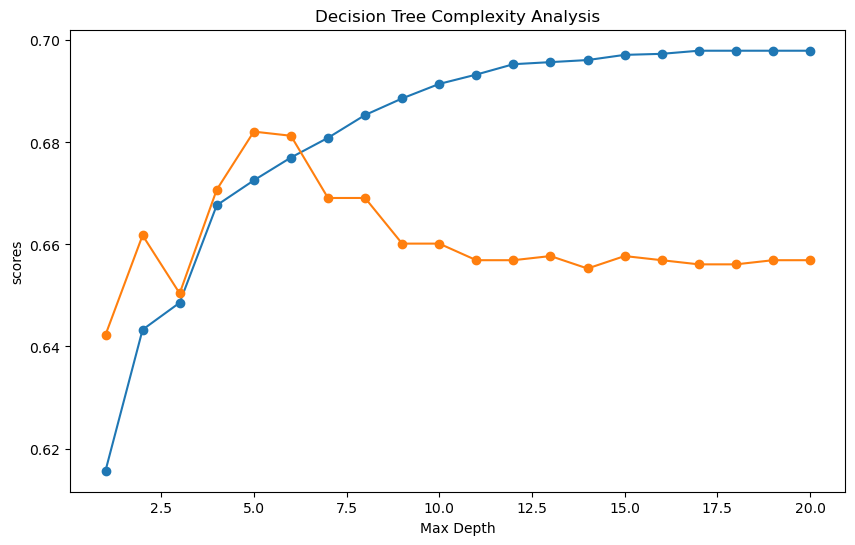

In [30]:
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels,random_state=1, test_size = 0.20)
max_depth_values = range(1, 21)
train_scores = []
test_scores = []

for depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(x_train, y_train)
    
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, label='Train scores', marker='o')
plt.plot(max_depth_values, test_scores, label='Test scores', marker='o')
plt.title('Decision Tree Complexity Analysis')
plt.xlabel('Max Depth')
plt.ylabel('scores')

plt.show()

In [45]:
train_scores = []
test_scores = []

clf1 = tree.DecisionTreeClassifier(splitter="best")
clf1.fit(x_train, y_train)

clf2 = tree.DecisionTreeClassifier(splitter="random")
clf2.fit(x_train, y_train)

train_score1 = clf.score(x_train, y_train)
test_score1 = clf.score(x_test, y_test)

train_score2 = clf2.score(x_train, y_train)
test_score2 = clf2.score(x_test, y_test)



print(train_score1,train_score2)

print(test_score1,test_score2)

0.6979674796747968 0.6979674796747968
0.656910569105691 0.6560975609756098


Q5: Construct the confusion matrix on a particular good configuration (after explaining your choice)

**explainning**
-  parmi tous les paramètres de configuration, max_depth est le plus important, donc ici on decide de fixer max_depth = 8 pour éviter le underfitting et overfitting.Pour tous les autres paramètres de configuration,on utilise la valeur  défaulte. 

In [50]:
from sklearn.metrics import confusion_matrix

clf = tree.DecisionTreeClassifier(max_depth=8)
clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:",cm)



Confusion Matrix: [[502 179]
 [228 321]]


Q6: Provide an evaluation of the fairness of the model based on the False Positive Rate

In [54]:
ffr=cm[0][1]/(cm[0][0]+cm[0][1])
ffr



0.26284875183553597

179 personnes ont été injustement jugées coupables, ce qui représente environ 0,26 % de toutes les personnes non coupables, ce qui signifie que si ce modèle était réellement appliqué, un quart des personnes seraient accusées à tort, ce qui est un taux d'erreur très élevé. De plus, 228 personnes coupables ont été jugées non coupables, ce qui montre également un taux d'erreur élevé de notre modèle. Cela pourrait entraîner de graves problèmes judiciaires et une injustice sociale.